In [99]:
import pandas as pd

titanic = pd.read_csv("/Users/thomassimmons/c/d/datasets/titanic.csv")

In [100]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [101]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
titanic.columns = titanic.columns.str.strip().str.lower()

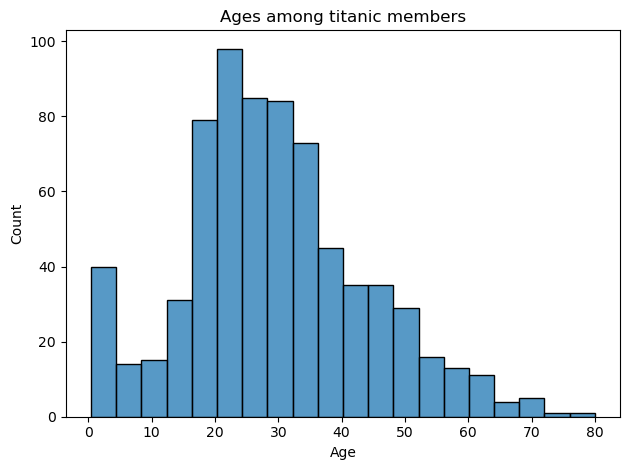

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(titanic['age'])
plt.title("Ages among titanic members")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<Axes: xlabel='pclass', ylabel='count'>

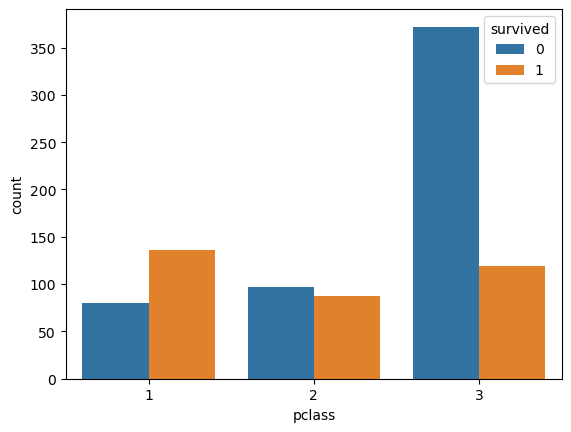

In [105]:
sns.countplot(x='pclass', hue='survived', data=titanic)

<Axes: xlabel='sex', ylabel='count'>

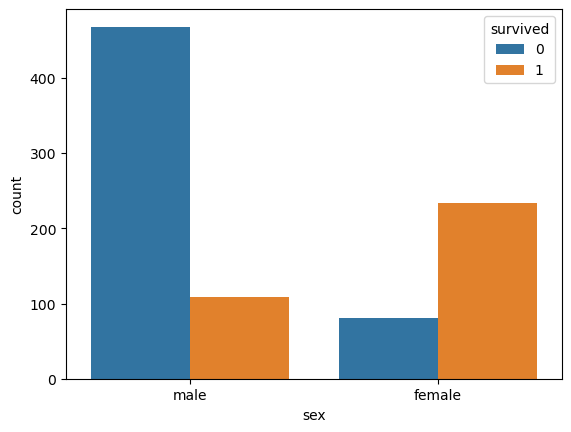

In [106]:
sns.countplot(x='sex',hue='survived', data=titanic)

In [107]:
titanic['cabin'].fillna(titanic['cabin'].mode(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode(), inplace=True)

/var/folders/kf/nt6wlgn90dvc9wsk7ttkqs4w0000gn/T/ipykernel_16136/3330614562.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['cabin'].fillna(titanic['cabin'].mode(), inplace=True)
/var/folders/kf/nt6wlgn90dvc9wsk7ttkqs4w0000gn/T/ipykernel_16136/3330614562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [108]:
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [109]:
titanic.drop(['cabin','ticket','name'], axis=1, inplace=True)

In [110]:
titanic['sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [111]:
titanic['sex'] = titanic['sex'].map({'male':0,'female':1})

In [112]:
titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)

In [113]:
titanic.columns = titanic.columns.str.replace(" ", "_")

In [114]:
titanic.columns

Index(['passengerid', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [115]:
titanic.dtypes

passengerid      int64
survived         int64
pclass           int64
sex              int64
age            float64
sibsp            int64
parch            int64
fare           float64
embarked_Q        bool
embarked_S        bool
dtype: object

In [125]:
titanic['age'].tail(10)

881    33
882    22
883    28
884    25
885    39
886    27
887    19
888     0
889    26
890    32
Name: age, dtype: int64

In [122]:
titanic['age'].fillna(titanic['age'].mode(), inplace=True)

titanic = titanic.fillna(0)

In [124]:
titanic['age'] = titanic['age'].astype('int64')